## Topic modeling
**目的**
1. 透過NMF、LDA等無監督式方法建立模型，將corpus內的documents擷取出可能的**主題**以及其**關鍵字**。
    - 其中主題是透過人工觀察後自己命名。
    - 可以當作關鍵字推薦系統的一種運用。
    - 可以當作自動聚攏相關關鍵字的運用，如customer support，微軟內部就有使用。
2. 透過BERT深度神經網路建立topic modeling運用。

In [ ]:
from time import time  # 計算模型運行時間
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

In [ ]:
# 超參數設定

n_samples = 2000    # 樣本數
n_features = 1000   # 特徵數
n_components = 10   # 主題數
n_top_words = 20    # 關鍵字數

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    """
        
    """
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):   # model.compoents_: (n_components, n_features)
        top_features_ind = topic.argsort()[:-n_top_words-1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"主題 {topic_idx+1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.9, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    

In [ ]:
# 讀取資料
data, _ = fetch_20newsgroups(
    shuffle=True,
    random_state=222,
    remove=("headers", "footers", "quotes"),
    return_X_y=True,
)
data_samples = data[:n_samples]
data_test = data[n_samples:]
data_samples[0]

'Would anyone out there in DoDland be able to help me out in giving me\na contact to purchase a pair of military air-borne combat boots (9 1/2\nD in size).  These boots (so I have read here on rec.moto) are calf\nheight boots that use only velcro for enclosure.  I have phoned around\nand nobody seems to carry such an item.  I admit I have not gone into\nthe deepest bowels of NYC yet for the search but I have made some\ncalls to several of the bigger army/navy type stores with no luck.\n\nAnyone out there know of a place that does carry such an item as well\nas does mail order?  Any help would be appreciated.'

In [ ]:
# 將文章轉換成tf-idf文章向量

tfidf_vectorizer = TfidfVectorizer(max_features=n_features, stop_words="english")
tfidf = tfidf_vectorizer.fit_transform(data_samples)

tfidf[1].data.shape

(34,)

In [ ]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
tfidf_feature_names[100:200]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['apartment',
 'app',
 'apple',
 'application',
 'applications',
 'appreciate',
 'appreciated',
 'approach',
 'appropriate',
 'apr',
 'april',
 'arab',
 'archive',
 'area',
 'aren',
 'argument',
 'armenian',
 'armenians',
 'army',
 'article',
 'ask',
 'asked',
 'asking',
 'assume',
 'au',
 'available',
 'average',
 'avoid',
 'away',
 'ax',
 'b8f',
 'bad',
 'base',
 'baseball',
 'based',
 'basic',
 'basis',
 'bay',
 'belief',
 'believe',
 'best',
 'better',
 'bh',
 'bhj',
 'bible',
 'big',
 'bike',
 'bit',
 'bits',
 'bj',
 'bl',
 'black',
 'blood',
 'bmw',
 'board',
 'body',
 'book',
 'books',
 'boston',
 'bought',
 'box',
 'build',
 'building',
 'built',
 'bus',
 'business',
 'buy',
 'bxn',
 'byte',
 'ca',
 'cable',
 'cache',
 'cal',
 'called',
 'came',
 'canada',
 'car',
 'card',
 'cards',
 'care',
 'cars',
 'case',
 'cases',
 'catholic',
 'cause',
 'cd',
 'center',
 'certain',
 'certainly',
 'chance',
 'change',
 'changed',
 'changes',
 'check',
 'chicago',
 'child',
 'children',
 'c

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF 模型訓練: 0.839s.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20027 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20027 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 38988 missing from current font.
  font.set_text(s, 0, flags=flags)


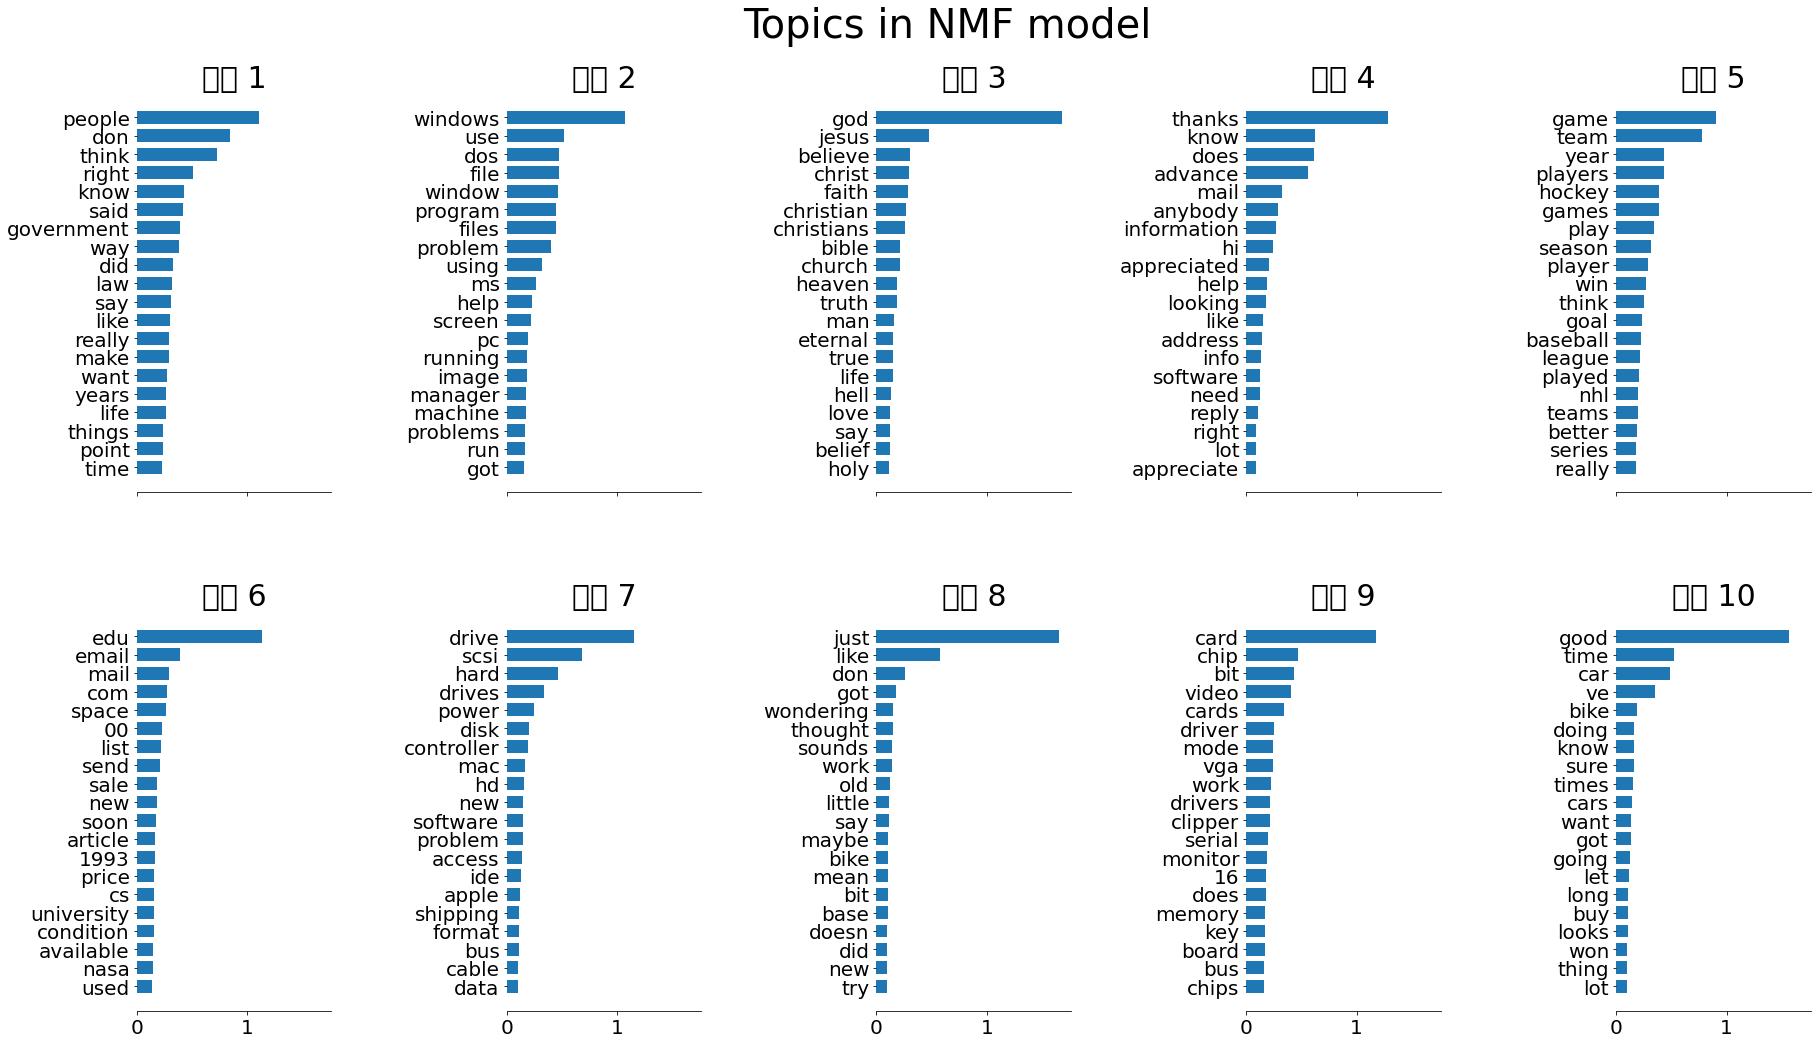

In [ ]:
# 將tfidf向量傳入NMF模型訓練
# 視覺化

t0 = time()
nmf = NMF(n_components=n_components, random_state=222).fit(tfidf)
print("NMF 模型訓練: %0.3fs." % (time()-t0))
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model",
)

LDA 模型訓練: 4.331s.


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20027 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20027 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 38988 missing from current font.
  font.set_text(s, 0, flags=flags)


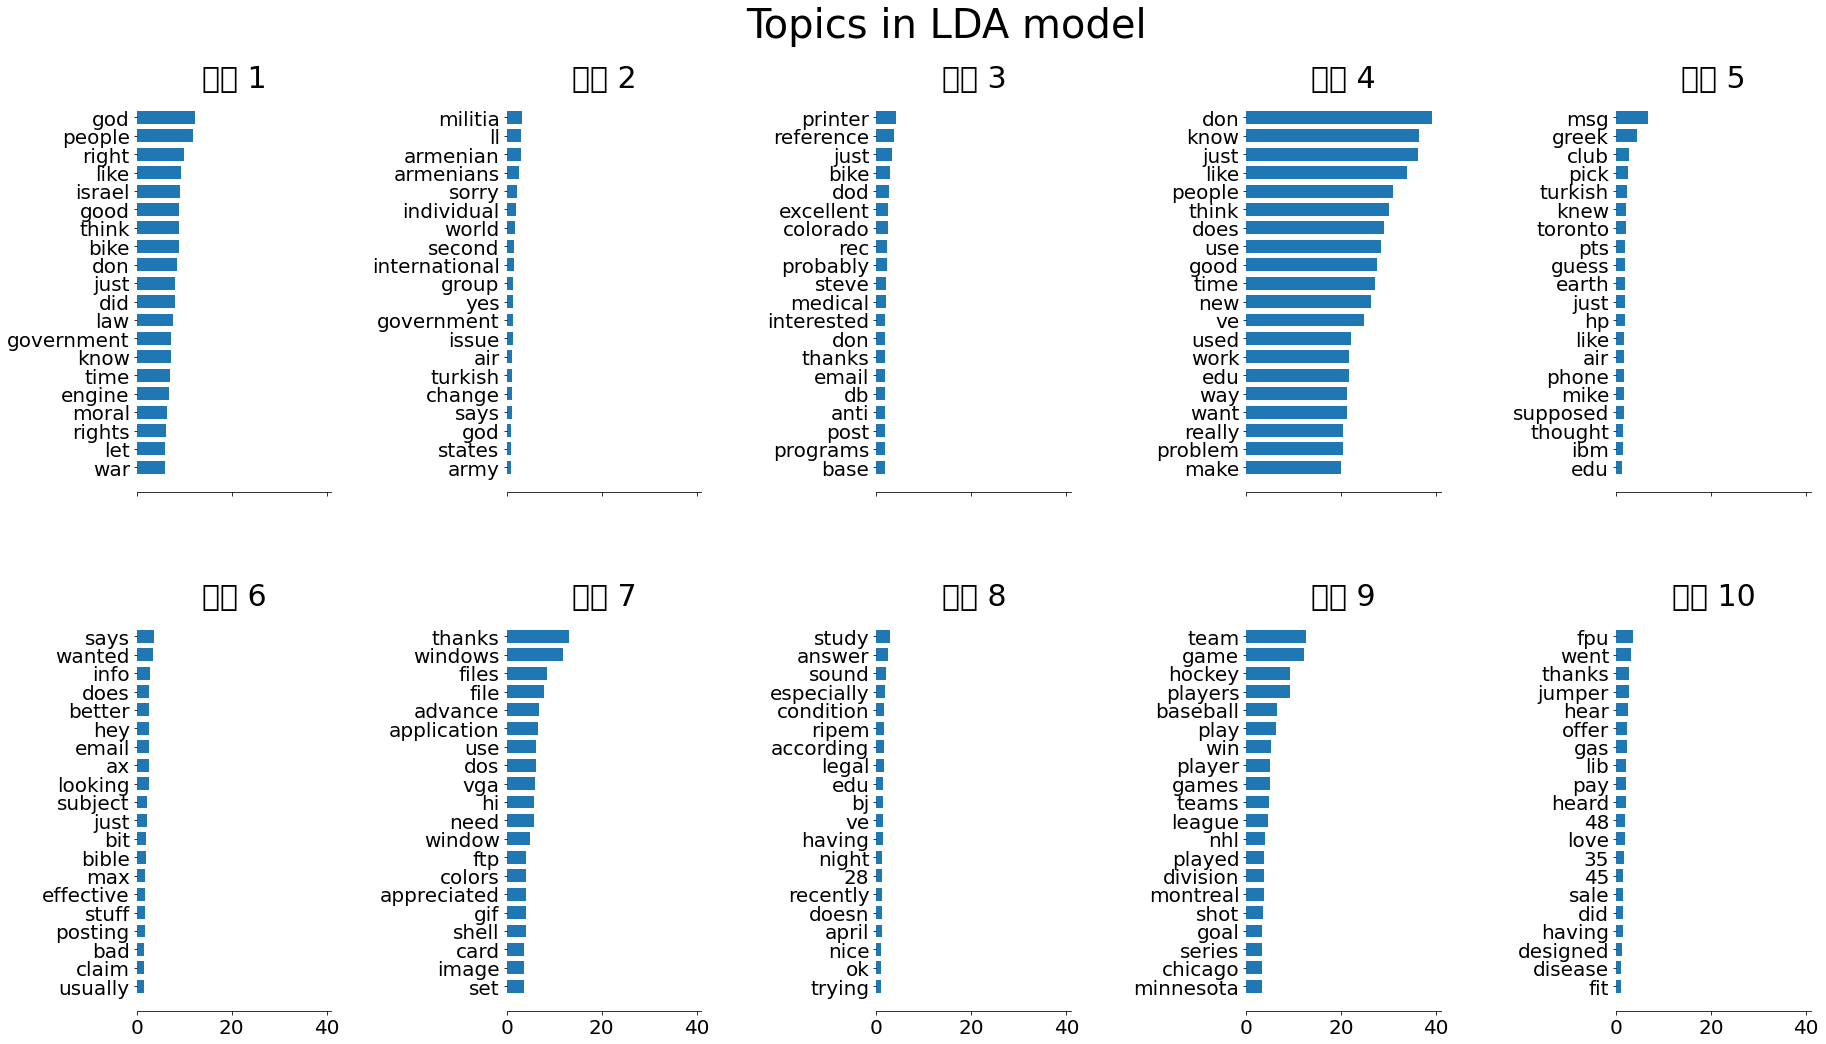

In [ ]:
# 將tfidf向量傳入NMF模型訓練
# 視覺化

t0 = time()
lda = LatentDirichletAllocation(n_components=n_components, random_state=222).fit(tfidf)
print("LDA 模型訓練: %0.3fs." % (time()-t0))
plot_top_words(
    lda,
    tfidf_feature_names,
    n_top_words,
    "Topics in LDA model",
)

In [ ]:
# 細細觀察

for idx in lda.components_[0].argsort()[::-1][:10]:
    print(idx, '->', tfidf_feature_names[idx], '->')

404 -> god ->
677 -> people ->
787 -> right ->
536 -> like ->
487 -> israel ->
407 -> good ->
899 -> think ->
146 -> bike ->
306 -> don ->
499 -> just ->


In [ ]:
# 用一些訓練外的資料去直接預測

len(data_test)

9314

In [ ]:
# 單一樣本
one_sample = [data_test[3]]

# 向量化
one_sample_tfidf = tfidf_vectorizer.transform(one_sample)

# 模型預測
one_sample_predict = lda.transform(one_sample_tfidf)  # (1, n_components)

# 此樣本主要屬於哪一個主題模型
print("樣本原文: ", one_sample)
print(one_sample_predict)
print(f"此樣本屬於主題模型 {one_sample_predict.argmax()+1}")

樣本原文:  ["From Israel Line, Thursday, April 22, 1993:\n \nToday's HA'ARETZ reports that three women were injured when a\nKatyusha rocket fell in the center of their community. The rocket\nwas one of several dozen fired at the communities of the Galilee in\nnorthern Israel yesterday by the terrorist Hizbullah organization [...] \n\n\n\nCongratulations to the brave men of the Lebanese resistance! With every\nIsraeli son that you place in the grave you are underlining the moral\nbankruptcy of Israel's occupation and drawing attention to the Israeli\ngovernment's policy of reckless disregard for civilian life.\n\n\n\tApparently, the Hizbollah were encouraged by Brad's cheers\n\t(good job, Brad). Someone forgot to tell them, though, that \n\tBrad asks them to place only Israeli _sons_ in the grave, \n\tnot daughters. Paraphrasing a bit, with every rocket that \n\tthe Hizbollah fires on the Galilee, they justify Israel's \n\tholding to the security zone. "]
[[0.4872044  0.0209696  0.02097054 

> LDA 後續可以透過learning_method參數設定為online去解決文本過大一次無法訓練問題。

## 主題模型效果的檢驗
- 方法有多種，方便起見，用LDA有內建的Perplexity
$$Perplexity(D) = exp \lbrace\frac{\sum_{d=1}^M log p(w_{d})}{\sum_{d=1}^M N_{d}}\rbrace$$,
$$D: 語料庫測試集$$
$$M: 文檔數目$$
$$N_{d}: 每篇文檔中的單詞數$$
$$W_{d}: 文檔d中的詞$$
$$P(W_{d}): 文檔中，產生W_{d}的機率$$

In [ ]:
# 目前模型的Perpexity
lda.bound_

3234.507728636339

In [ ]:
# 用max_iter超參數當做一個範例
for max_iter in [10, 50, 100]:
    t = time()
    lda = LatentDirichletAllocation(n_components=n_components, max_iter=max_iter).fit(tfidf)
    print(f'max_iter: {max_iter}, 訓練時間: {time()-t}, Perplexity(D)={lda.bound_}')

max_iter: 10, 訓練時間: 4.428543567657471, Perplexity(D)=3543.3141225308873
max_iter: 50, 訓練時間: 14.989164113998413, Perplexity(D)=3249.5059149488025
max_iter: 100, 訓練時間: 26.749639749526978, Perplexity(D)=3192.3055641936935


## 2. Topic modeling with BERT
- 雖然LDA、NMF方法是一個topic modeling 很經典的方法，但這些方法是基於 tf-idf ，詞、句之間的順序關係較為少運用到。
- 因此BERT模型 as NLP預訓練模型的主流運用，可以在此幫助建立更好的詞、句之間的關係。
- 步驟
    1. 資料讀取
    2. embedding
    3. Clustering
    4. Topic Creation
    5. Topic Reduction

In [ ]:
# 1.資料讀取

from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups(subset='all')['data']

In [ ]:
!pip install sentence-transformers

     |████████████████████████████████| 78 kB 5.1 MB/s 
     |████████████████████████████████| 3.1 MB 30.7 MB/s 
     |████████████████████████████████| 3.3 MB 38.9 MB/s 
     |████████████████████████████████| 1.2 MB 31.2 MB/s 
     |████████████████████████████████| 59 kB 7.4 MB/s 
     |████████████████████████████████| 895 kB 53.5 MB/s 
     |████████████████████████████████| 596 kB 51.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=d11080105d9566c12c0917222e8f8765e84612b132376e11ab1c112e2c9af767
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# 2. Embeddings
# 將documents轉變為向量方便處理，可以用各種預訓練模型: https://www.sbert.net/docs/pretrained_models.html

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(data, show_progress_bar=True)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/589 [00:00<?, ?it/s]

In [ ]:
# 這會算比較久, 可以儲存起來
import numpy as np

np.save('sbert_embedding.npy', embeddings)
embeddings = np.load('sbert_embedding.npy')

In [ ]:
embeddings.shape

(18846, 768)

> **因為模型本身有token limit，如果documents太大，需要將其自行轉換。**

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 4.1 MB/s 
     |████████████████████████████████| 1.1 MB 32.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=ae97a02b684d4bdc4832a5e4f213b39884cfef386d19543f7270b93da0d1eb4c
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=24db9479ca35c200ea9a6e92238df2da8b792ea9086becdf8681fcb621564c30
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
# 3. Clustering
# 因為Clustering演算法的關係，通常對於高維度的向量效果不佳
# 因此可以透過降維方法，先將embeddings降維(UMAP)
# 再透過clustering方法將其分群, HDBSAN

import umap.umap_ as umap

reducer = umap.UMAP(n_neighbors=15, n_components=5, metric='cosine')
umap_embeddings  = reducer.fit_transform(embeddings)
umap_embeddings.shape

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(18846, 5)

> 此處的[UMAP超參數](https://umap-learn.readthedocs.io/en/latest/parameters.html)其實相當關鍵，需要好好調整，根據實際狀況調整

In [ ]:
!pip install hdbscan

     |████████████████████████████████| 6.4 MB 9.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311925 sha256=ef39ee2cf0e6f2e17897e835c49c3f198e2e2467138245e8c18807dd0263b3da
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [ ]:
# # 解決下面的 ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject
# !pip uninstall numpy
# !pip install numpy

# import numpy as np

In [ ]:
import hdbscan
cluster = hdbscan.HDBSCAN(
    min_cluster_size=10,
    metric='euclidean',
    cluster_selection_method='eom'
).fit(umap_embeddings)

- **現在已經將相似的documents聚合在一起，背後代表了相似的主題**
- 使用HDBCAN的好處就是可以將cluster數目自動分好，常常這是一個分群的關鍵問題，且可以將一些不符合各群的資料當作outliers，以算法相當robust
- 接著將向量再次縮減成維度2，即可透過圖像觀察分群結果。

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


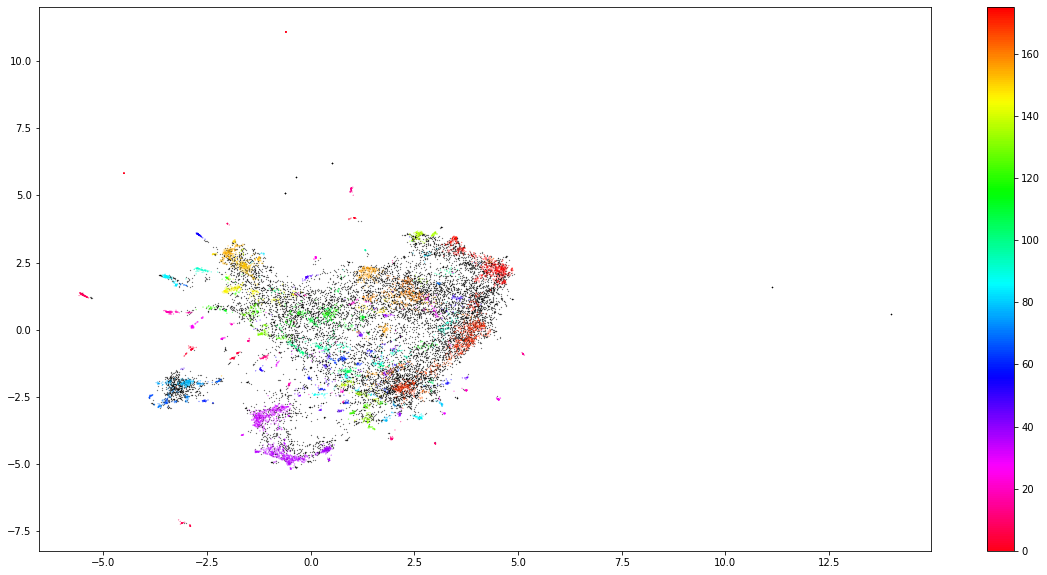

In [ ]:
# 資料轉換成二維可視化
import pandas as pd

umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# 視覺化
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]  # label == -1 代表 模型認定的outliers
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color="black", s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

**4. Topic Creation**

> 我們該如何從clustered documents取得topics?

- 答案是: c-TF-IDF，可以讓我們取得獨特的docuemnts。
- 背後的直覺是:
    - 當我們一般使用tf-idf方法時，我們是想要比較words在不同documents之間的重要性。
    - **那麼我們將所有的documents視為一個cluster，當作一個新的document，然後將其運用tf-idf，是不是我們就是在比較不同words在不同cluster的重要性，就達成了topic modeling的效果了!**


**c-TF-IDF**
- 要創造此指標，我們需要先建立新的document，根據每一個cluster聚集而來。
$$c-TF-IDF_{i} = \frac{t_{i}}{w_{i}} * log \frac{m}{\sum_{j}^n t_{j}}$$

In [ ]:
docs_df = pd.DataFrame(data, columns=['Doc'])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))

docs_per_topic = docs_df.groupby(['Topic'], as_index=False).agg({'Doc': ' '.join})

In [49]:
print(docs_per_topic.shape)
docs_per_topic.head()

(177, 2)


,Topic,Doc
0,-1,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...
1,0,Subject: roman 03/14\nFrom: pwiseman@salmon.us...
2,1,From: etxonss@ufsa.ericsson.se (Staffan Axelss...
3,2,From: rdb1@cbnewsj.cb.att.com (ronald.j.debloc...
4,3,From: an030@cleveland.Freenet.Edu (Broward Hor...


In [53]:
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)
    
    return tf_idf, count

tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(data))

In [54]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Topic,Size
0,-1,11140
36,35,475
34,33,446
171,170,419
176,175,379
157,156,209
153,152,198
170,169,176
155,154,166
160,159,161


In [55]:


# [cluster][:top_n]

top_n_words[7][:10]

[('henrik', 0.09885742440988546),
 ('armenia', 0.07235687422368405),
 ('bm', 0.05619878949452542),
 ('planes', 0.05500665543588092),
 ('armenians', 0.04818252340000228),
 ('turkish', 0.04651057221256349),
 ('onur', 0.042532044232222226),
 ('yalcin', 0.042532044232222226),
 ('azeris', 0.04220950064394973),
 ('turkey', 0.04137940124217651)]

**5. Topic Reduction**
- 因為演算法的緣故可能產生大量的主題，那麼如果我們希望有一些主題可以合併呢?
- 根據Top2Vec的技巧，我們將相似的主題合併。
- 我們可以使用類似的技術，通過比較主題之間的 c-TF-IDF 向量，合併最相似的向量，最後重新計算 c-TF-IDF 向量來更新我們主題的表示

In [58]:
tf_idf.shape

(173451, 177)

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

for i in range(20):
    # 計算相似度
    similarities = cosine_similarity(tf_idf.T)
    np.fill_diagonal(similarities, 0)

    # Extract label to merge into and from where
    topic_sizes = docs_df.groupby(['Topic']).count().sort_values("Doc", ascending=False).reset_index()
    topic_to_merge = topic_sizes.iloc[-1].Topic
    topic_to_merge_into = np.argmax(similarities[topic_to_merge + 1]) - 1

    # Adjust topics
    docs_df.loc[docs_df.Topic == topic_to_merge, "Topic"] = topic_to_merge_into
    old_topics = docs_df.sort_values("Topic").Topic.unique()
    map_topics = {old_topic: index - 1 for index, old_topic in enumerate(old_topics)}
    docs_df.Topic = docs_df.Topic.map(map_topics)
    docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

    # Calculate new topic words
    m = len(data)
    tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m)
    top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)

topic_sizes = extract_topic_sizes(docs_df); 
topic_sizes.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

,Topic,Size
0,-1,11236
31,30,475
30,29,456
151,150,429
156,155,379
139,138,229
135,134,208
150,149,176
137,136,166
142,141,161


In [60]:
topic_sizes.shape

(157, 2)

> 到此就完成一個完整的透過SBERT完成的topic modeling！